## Classification by :
* Bag of words
* TFIDF
* N-grams

In [32]:
# Loading necessary modules
import pandas as pd              # data processing; csv file i/o (pd.read_csv)
import numpy as np               # linear algebra
import matplotlib.pyplot as plt  # visulaization
%matplotlib inline

In [33]:
# Loading the dataset
data = pd.read_csv(r'C:\Users\TARUN JAIN\Desktop\tweet.csv')

In [34]:
data.head()

,Id,Content,Sentiment
0,49640624.0,the end,Negative
1,43505275.0,god over everything,Negative
2,43505275.0,i m sorry,Negative
3,43505275.0,god please forgive me,Negative
4,43505275.0,this day couldn t get any worse,Negative


In [35]:
print("type of text_train: ", type(data['Content']))

type of text_train:  <class 'pandas.core.series.Series'>


In [36]:
len(data)

11440

In [37]:
texts = []
labels = []
for i, label in enumerate(data['Sentiment']):
    texts.append(data['Content'][i])
    if label == 'Negative':
        labels.append(0)
    else:
        labels.append(1)

In [38]:
texts = np.asarray(texts)
labels = np.asarray(labels)

In [39]:
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 11440
number of labels:  11440


In [40]:
print(type(texts))

<class 'numpy.ndarray'>


In [41]:
print(texts[0])

the end 


In [42]:
print(np.unique(labels))
print(np.bincount(labels))

[0 1]
[ 1195 10245]


In [43]:
10245/1195    #More negative

8.573221757322175

In [44]:
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
texts = texts[indices]
labels = labels[indices]

# we will use 80% of data as training, 20% as validation data
training_samples = int(11440 * .8)
validation_samples = int(11440 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

texts_train = texts[:training_samples]
y_train = labels[:training_samples]
texts_test = texts[training_samples:]
y_test = labels[training_samples:]

True
The number of training 9152, validation 2288 


In [45]:
# Example
toy_samples = ["It is sunny today and I like it, ", 
               "she does not like hamburger"]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# tokenize the document (split texts into each unique words)
vect.fit(toy_samples)
print("tokenization")
print(vect.vocabulary_, "\n")

# transform document into a matrix(the number indicates the number of words showing up in the document)
bag_of_words = vect.transform(toy_samples)
print("Transformed sparse matrix is: ")
print(bag_of_words.toarray())

tokenization
{'it': 4, 'is': 3, 'sunny': 8, 'today': 9, 'and': 0, 'like': 5, 'she': 7, 'does': 1, 'not': 6, 'hamburger': 2} 

Transformed sparse matrix is: 
[[1 0 0 1 2 1 0 0 1 1]
 [0 1 1 0 0 1 1 1 0 0]]


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(texts_train)
X_train = vect.transform(texts_train)
print(repr(X_train))

<9152x14933 sparse matrix of type '<class 'numpy.int64'>'
	with 151217 stored elements in Compressed Sparse Row format>


In [47]:
X_train.shape

(9152, 14933)

In [48]:
X_test = vect.transform(texts_test)

In [49]:
np.bincount(y_train)

array([ 940, 8212], dtype=int64)

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
grid_score=-0.12
logreg_train = grid.fit(X_train, y_train)

In [51]:
print(grid.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [52]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ".format(grid.best_score_))

accuracy is: 


In [79]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[ 152  103]
 [  35 1998]]


In [80]:
#Improve
#check vocab
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

14933


['00', '000', '00s', '01', '028', '0628', '0800', '09', '10', '100', '1000', '1000000', '1000th', '100caloriesnacks2adaymax', '100episodesofyudkbh', '100th', '100x', '101', '103', '104']


['ziglar', 'zillion', 'zimbabwe', 'zines', 'zionists', 'zippy', 'zippytop', 'zodiacpeople', 'zoe', 'zoloft', 'zombie', 'zone', 'zonniques', 'zoo', 'zoom', 'zootopia', 'zora', 'zorich', 'zuperman', 'zwei']


['00', 'accepts', 'ancestors', 'avoiding', 'binging', 'bury', 'chesterton', 'condemnable', 'cupcakes', 'details', 'dsmme', 'estyn', 'fierce', 'futures', 'groups', 'ho', 'incomplete', 'jeongin', 'lab', 'losers', 'melancholy', 'museum', 'nhis', 'nvr', 'painting', 'platforms', 'providers', 'regan', 'rostam', 'servicemen', 'snap', 'stops', 'tan', 'ton', 'unfilial', 'washington', 'x80xxv', 'yabookpromo']


## Bag of words
#### Transform texts into bag of words matrix(number of columns == number of unique words, number of rows == total set 

In [81]:
# We will use only the words that appear in at least 3 tweets -- In other words, we will use frequent words which are also likely to be in the test set
# min_df controls this condition(min_df=3 means pick up words which appear
# at least 3 documents)
vect = CountVectorizer(min_df=3).fit(texts_train)
X_train = vect.transform(texts_train)
X_test = vect.transform(texts_test)
print(repr(X_train))

<9152x4718 sparse matrix of type '<class 'numpy.int64'>'
	with 138750 stored elements in Compressed Sparse Row format>


In [82]:
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

4718


['00', '000', '0628', '10', '100', '100episodesofyudkbh', '100th', '101', '10th', '11', '119', '11th', '12', '12th', '13', '14', '1485', '15', '150', '150k']


['younger', 'youngest', 'youngpeople', 'your', 'youre', 'yours', 'yourself', 'yourselves', 'youth', 'youths', 'youtube', 'yr', 'yrs', 'yudkbh', 'yup', 'zayn', 'zazzle', 'zero', 'zig', 'zombie']


['00', 'awareness', 'choosing', 'dies', 'figure', 'honor', 'lie', 'nervosa', 'porn', 'sars', 'sucks', 'vegan']


In [83]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_score=-0.09
grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [84]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.846625874126


In [85]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[ 146  109]
 [  36 1997]]


In [86]:
# remove stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words is :", len(ENGLISH_STOP_WORDS), "\n")
print("Examples: ", list(ENGLISH_STOP_WORDS)[::10])

Number of stop words is : 318 

Examples:  ['detail', 'another', 'other', 'several', 'seemed', 'sincere', 'side', 'whom', 'anyway', 'otherwise', 'further', 'along', 'than', 'hers', 'put', 'our', 'wherein', 'too', 'due', 'below', 'one', 'hence', 'whose', 'only', 'seems', 'all', 'thick', 'everywhere', 'some', 'next', 'un', 'onto']


In [87]:
vect = CountVectorizer(min_df=3, stop_words='english').fit(texts_train)
X_train = vect.transform(texts_train)
grid_score=-0.07
X_test = vect.transform(texts_test)
print(repr(X_train))

<9152x4464 sparse matrix of type '<class 'numpy.int64'>'
	with 78782 stored elements in Compressed Sparse Row format>


In [88]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [89]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.861818181818
confusion matrix 
 [[ 136  119]
 [  37 1996]]


## TFIDF
#### Difference from bag of words -- tfidf gives hight weights to the words which appear less in many document. In other words, it recoginizes the words showing specific document as important words (since these are the s features of the specific documents )

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [91]:
logreg = LogisticRegression()
pipe = make_pipeline(TfidfVectorizer(min_df=3, norm=None, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid_score=-0.05
logreg_train = grid.fit(texts_train, y_train)

In [92]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [93]:
print(grid.best_estimator_)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [94]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(texts_test)
print("accuracy is: ", grid.score(texts_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.880506993007
confusion matrix 
 [[ 125  130]
 [  29 2004]]


In [95]:
# Check which words are considered to be low tfidf(widely used words across many tweets) and high tfidf (used only in a few tweets)
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(texts_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names())

print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("featues with hightest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['congratulations' 'today' 'frustration' 'helpless' 'rt' 'regret'
 'celebrations' 'satisfy' 'having' 'x99ve' 'doing' 'n1' 'n2' 'thing'
 'doesn' 'feeling' 'url' 'nurl' 'actually' 'tonight'] 

featues with hightest tfidf
['nwhat' 'lt' 'nof' 'shy' 'platinum' 'x9d' 'nbe' 'mccain' 'dragon' 'ye'
 'nsomeone' 'boo' 'gotta' 'nyou' 'piece' 'hurts' 'nat_user' '00' 'trump'
 'issue']


In [96]:
!pip install mglearn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Text(0.5,1,'tfidf-cofficient')

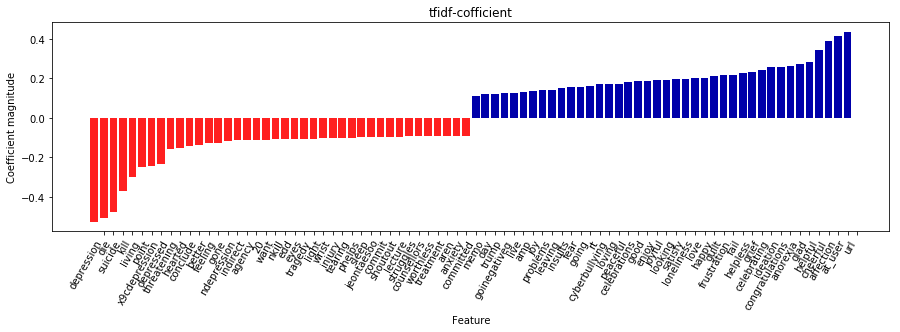

In [97]:
import mglearn 
grid_score=-0.024
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_, 
                                   feature_names, n_top_features=40)
plt.title("tfidf-cofficient")

## Ngrams
#### often single word is misleading predictor. For example, "like" and "don't like" are opposite

In [98]:
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(texts_train, y_train)

# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(texts_test)
print("accuracy is: ", grid.score(texts_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.910877622378
confusion matrix 
 [[ 143  112]
 [  37 1996]]


In [99]:
print(grid.best_estimator_)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


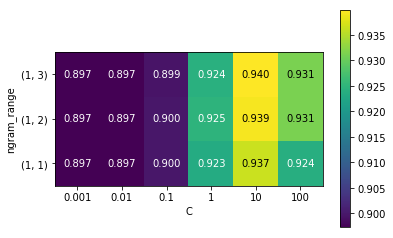

In [100]:
scores = [s.mean_validation_score for s in grid.grid_scores_]
scores = np.array(scores).reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", 
                                xticklabels=param_grid['logisticregression__C'], 
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'], 
                                cmap='viridis', fmt="%.3f")
plt.colorbar(heatmap);

Text(0.5,1,'tfidf-cofficient')

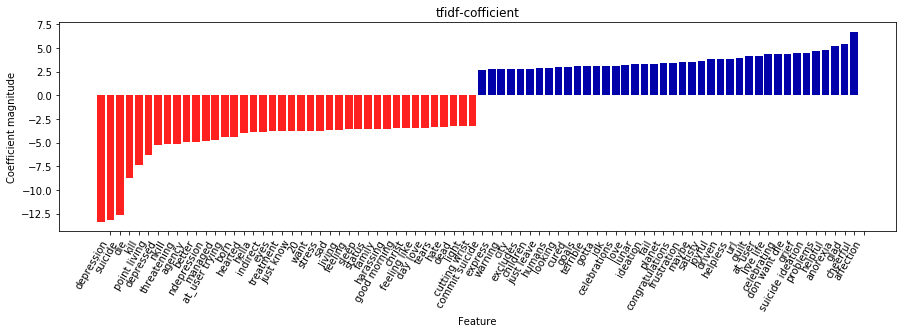

In [101]:
feature_names = np.array(grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names, n_top_features=40)
plt.title("tfidf-cofficient")